# MRMS and GFS re-gridding

In [1]:
import sys
import time
import h5py
import pygrib
import numpy as np
import netCDF4 as nc
from datetime import datetime, timedelta

In [3]:
# graph tools
import cmaps
import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du

In [6]:
from scipy.spatial import cKDTree

## Spatial aggregation from 0.01 deg to 0.1 deg

In [ ]:
def spatial_agregate(data, size=10):
    Nx, Ny = data.shape
    Nxa = Nx // 10; Nya = Ny // 10
    out = np.empty((Nxa, Nya))
    
    for i in range(Nxa):
        for j in range(Nya):
            out[i, j] = np.mean(data[i*size:(i*size+size), j*size:(j*size+size)])
    return out

In [79]:
with h5py.File(save_dir+'MRMS_ERA5_domain.hdf', 'r') as h5io:
    lon_MRMS = h5io['lon_MRMS'][...]
    lat_MRMS = h5io['lat_MRMS'][...]
    elev_MRMS = h5io['elev_MRMS'][...]
    land_mask_MRMS = h5io['land_mask_MRMS'][...]

land_mask_01 = spatial_agregate(land_mask_MRMS, size=10)
land_mask_01[land_mask_01<0.5] = 0
land_mask_01[land_mask_01>=0.5] = 1

elev_01 = spatial_agregate(elev_MRMS, size=10)

lat_01 = spatial_agregate(lat_MRMS, size=10)
lon_01 = spatial_agregate(lon_MRMS, size=10)

land_mask_01 = land_mask_01[47:303, 53:629]
elev_01 = elev_01[47:303, 53:629]
lon_01 = lon_01[47:303, 53:629]
lat_01 = lat_01[47:303, 53:629]

elev_01[elev_01<0] = 0

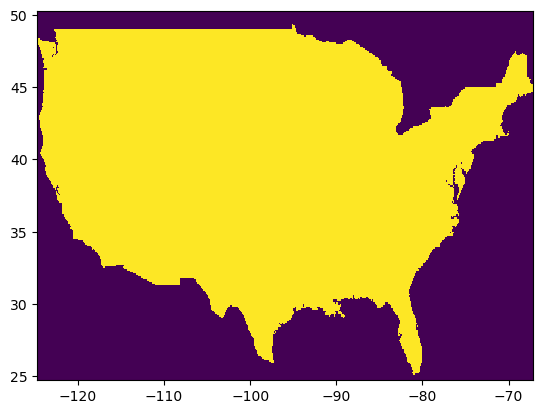

In [80]:
plt.pcolormesh(lon_01, lat_01, land_mask_01)

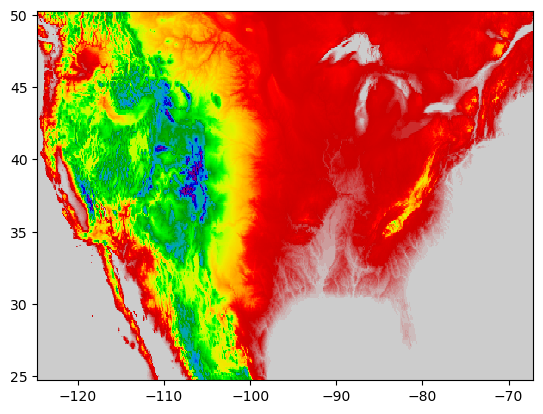

In [81]:
plt.pcolormesh(lon_01, lat_01, elev_01, cmap=plt.cm.nipy_spectral_r)

## Save data

In [82]:
# tuple_save = (lon_01, lat_01, elev_01, land_mask_01)
# label_save = ['lon_01', 'lat_01', 'elev_01', 'land_mask_01']
# du.save_hdf5(tuple_save, label_save, save_dir, 'CNN_domain.hdf')

Save to /glade/work/ksha/GAN/CNN_domain.hdf
